In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [85]:
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')

In [86]:
test.columns

Index(['Id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24'],
      dtype='object')

In [87]:
train.loc[:,'Train'] = 1
test.loc[:,'Train'] = 0

tot_df = pd.concat([train,test], ignore_index=True)

In [88]:
tot_df.head(5)

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,Train
0,1,1.0,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1,1
1,2,1.0,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1,1
2,3,1.0,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1,1
3,4,1.0,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1,1
4,5,1.0,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1,1


In [89]:
train.shape

(16383, 27)

In [90]:
train.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,Train
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.0
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,1.041812,4.976317,1.042483,6.378380,119774.307941,0.293940,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948,1.0
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,0.258226,65.629620,0.254664,108.216528,5609.093416,1.728999,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640,0.0
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,1.000000,1.000000,117880.000000,-7.446045,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.0
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,1.000000,1.000000,118232.000000,-0.704562,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.0
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,1.000000,0.000000,1.000000,1.000000,118565.000000,1.000000,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000,1.0
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,1.000000,1.000000,1.000000,2.000000,119348.000000,1.000000,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000,1.0
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,11.000000,5036.000000,8.000000,10076.000000,270691.000000,7.398682,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000,1.0


In [91]:
## looks like many of these columns are categorical, lets convert them
train_decoy = train.copy()

cat_features = []
for i in range(1,25):
  if i!=14:
    cat_features.append('f' + str(i))

for feat in cat_features:
  train_decoy[feat] = train_decoy[feat].astype(str)

cat_features = train_decoy.select_dtypes(include=[np.object])

In [92]:
# investigate categorical features
cat_features.describe(include='object')

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383,16383
unique,5170,7,168,162,8,9,118,1851,7,182,7,157,322,3555,432,67,9,322,7,8,7,906,7
top,4674,1,1.77,118300,1,0,117961,117906,1,0,1,1,118322,770,117878,290919,1,118321,1,1,1,1,1
freq,431,15807,10031,2213,15795,15745,10756,3509,15839,9965,15816,10038,2364,75,583,5561,15778,2364,15801,15775,15816,6394,15798


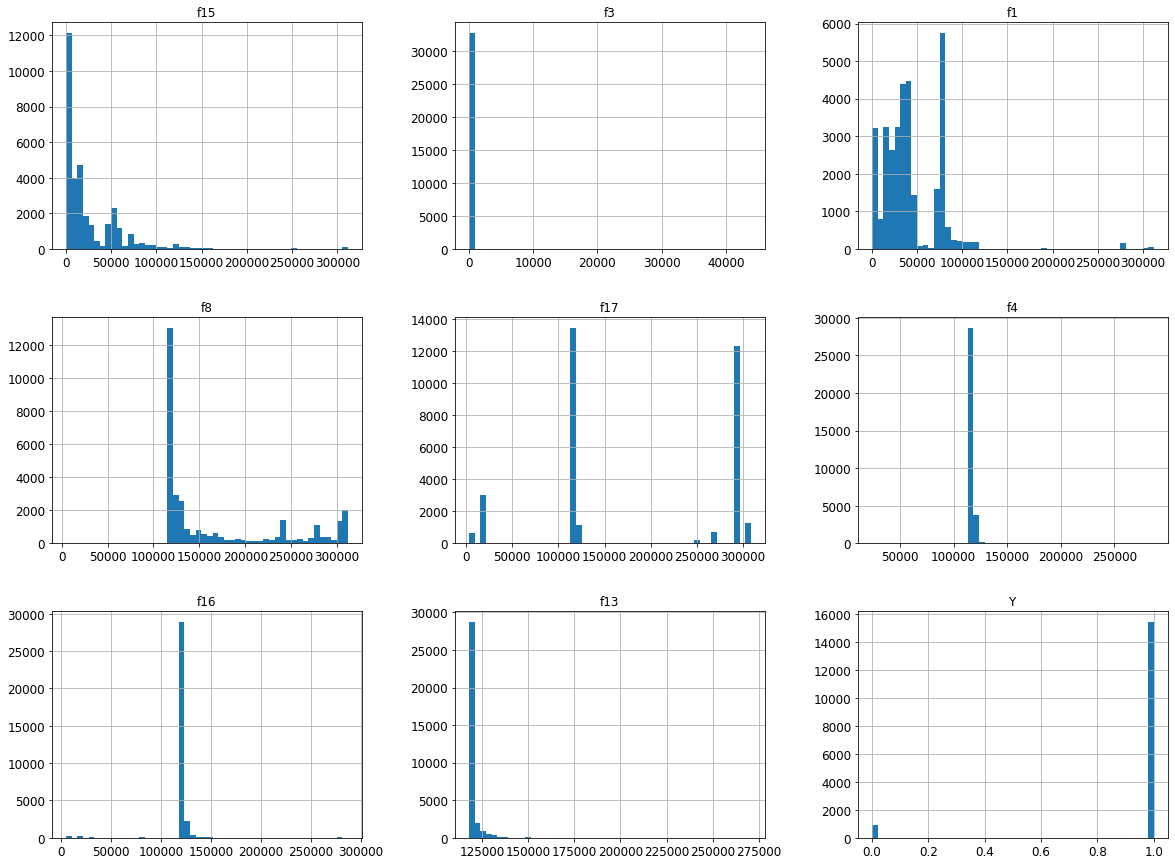

In [10]:
## according to feature importances that model outputs these are important - besides f14

can = tot_df[['f15','f3', 'f1', 'f8', 'f17', 'f4', 'f16', 'f13', 'Y']]
can.hist(bins=50, figsize=(20,15))
plt.show()

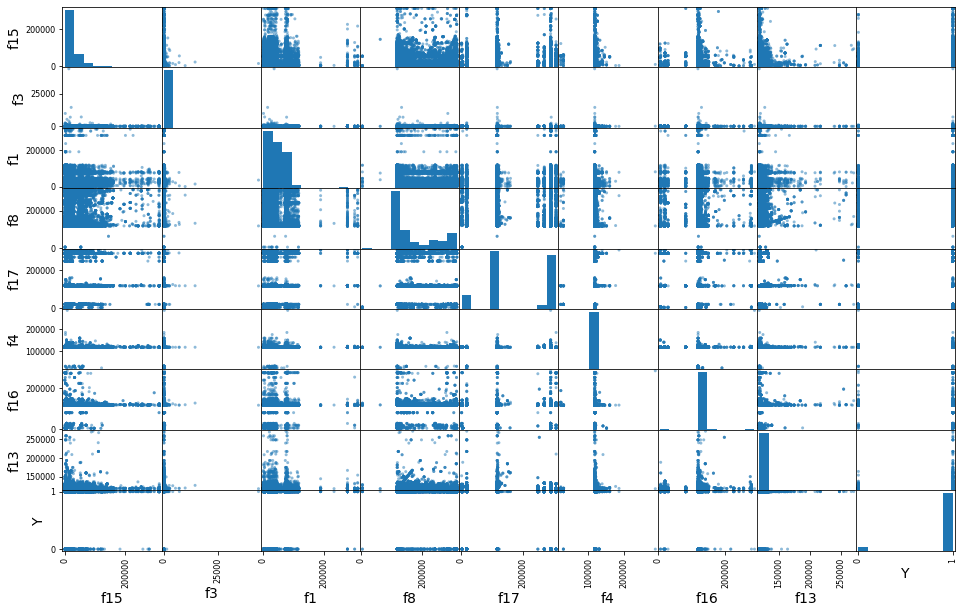

In [11]:
pd.plotting.scatter_matrix(can, figsize=(16,10));

In [98]:
tot_df.f14.value_counts() 

 1.000000    9403
 0.000000     597
-2.744231       1
-0.772375       1
 4.391614       1
             ... 
-1.257747       1
-0.431481       1
-0.912233       1
-0.295385       1
 0.128125       1
Name: f14, Length: 22770, dtype: int64

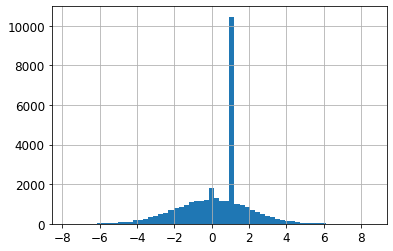

In [101]:
tot_df.f14.hist(bins=60)

In [14]:
tot_df.loc[tot_df.f4<=tot_df.f4.quantile(0.002)]

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,Train
124,125,1.0,40419,1,5.31,23779,1,0,118074,119192,1,1,1,2,119194,-1.609835,55896,131868,119184,1,119192,1,1,1,1,1,1
362,363,1.0,20285,1,14.16,31010,1,0,118185,147516,1,1,1,2,118570,1.268462,1999,117920,19721,1,118568,1,1,1,2,1,1
644,645,0.0,40776,1,28.32,31010,1,0,118185,117913,1,12,1,1,117888,0.000000,31851,117941,117887,1,117885,1,2,1,4,1,1
1294,1295,1.0,20350,1,1.77,23779,1,0,118074,119192,1,0,1,3,119194,-3.043242,55896,131868,119184,1,119192,1,1,1,4,1,1
1441,1442,1.0,40776,1,1.77,31010,1,0,118185,241805,1,0,1,2,118570,-2.846557,31851,117941,19721,1,118568,1,1,1,68,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31360,31361,NaN,27415,1,1.77,31010,1,0,118185,310732,1,2,1,2,118570,1.288966,27484,117920,19721,2,118568,1,1,1,2,1,0
31441,31442,NaN,33641,1,14.16,31010,1,0,118185,147755,1,0,1,1,117880,-1.769940,31851,117941,19721,1,117879,1,1,1,1,1,0
32076,32077,NaN,36894,1,1.77,31010,1,0,118185,147755,1,0,1,1,117880,0.144163,31851,117941,19721,1,117879,1,1,1,1,1,0
32208,32209,NaN,60781,1,1.77,23779,1,0,118074,119192,1,0,1,1,119194,-0.448874,55896,131868,119184,1,119192,1,1,1,2,1,0


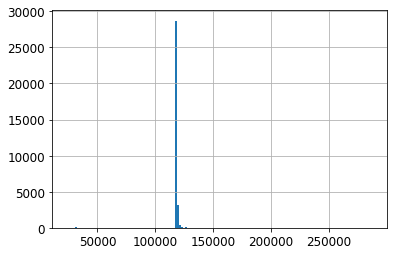

In [107]:
tot_df.f4.hist(bins=150);

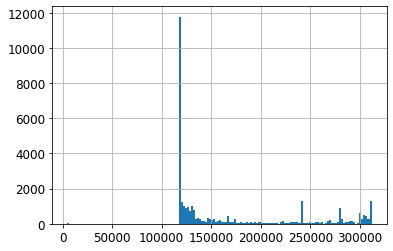

In [16]:
tot_df.f8.hist(bins=150)

In [108]:
tot_df.loc[tot_df.f4<=tot_df.f4.quantile(0.002)]

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,Train
124,125,1.0,40419,1,5.31,23779,1,0,118074,119192,1,1,1,2,119194,-1.609835,55896,131868,119184,1,119192,1,1,1,1,1,1
362,363,1.0,20285,1,14.16,31010,1,0,118185,147516,1,1,1,2,118570,1.268462,1999,117920,19721,1,118568,1,1,1,2,1,1
644,645,0.0,40776,1,28.32,31010,1,0,118185,117913,1,12,1,1,117888,0.000000,31851,117941,117887,1,117885,1,2,1,4,1,1
1294,1295,1.0,20350,1,1.77,23779,1,0,118074,119192,1,0,1,3,119194,-3.043242,55896,131868,119184,1,119192,1,1,1,4,1,1
1441,1442,1.0,40776,1,1.77,31010,1,0,118185,241805,1,0,1,2,118570,-2.846557,31851,117941,19721,1,118568,1,1,1,68,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31360,31361,NaN,27415,1,1.77,31010,1,0,118185,310732,1,2,1,2,118570,1.288966,27484,117920,19721,2,118568,1,1,1,2,1,0
31441,31442,NaN,33641,1,14.16,31010,1,0,118185,147755,1,0,1,1,117880,-1.769940,31851,117941,19721,1,117879,1,1,1,1,1,0
32076,32077,NaN,36894,1,1.77,31010,1,0,118185,147755,1,0,1,1,117880,0.144163,31851,117941,19721,1,117879,1,1,1,1,1,0
32208,32209,NaN,60781,1,1.77,23779,1,0,118074,119192,1,0,1,1,119194,-0.448874,55896,131868,119184,1,119192,1,1,1,2,1,0


In [109]:
# tot_df.loc[tot_df.f8<=tot_df.f8.mode().iloc[0], 'f8'] = tot_df.f8.mode().iloc[0]

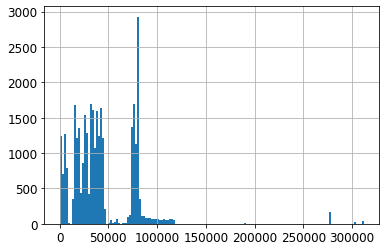

In [110]:
tot_df.f1.hist(bins=150)

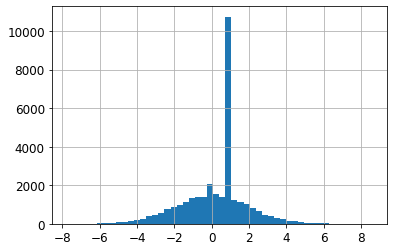

In [111]:
tot_df.f14.hist(bins=50)

In [112]:
tot_df.f14.value_counts()

 1.000000    9403
 0.000000     597
-2.744231       1
-0.772375       1
 4.391614       1
             ... 
-1.257747       1
-0.431481       1
-0.912233       1
-0.295385       1
 0.128125       1
Name: f14, Length: 22770, dtype: int64

In [113]:
# tot_df['f14_1'] = tot_df.apply(lambda x: 1 if x.f14 == 1 else 0, axis=1)
# tot_df['f14_0'] = tot_df.apply(lambda x: 1 if x.f14 == 0 else 0, axis=1)
# tot_df.drop('f14', axis=1, inplace=True)

In [114]:
# tot_df[(tot_df.Train==1) & (tot_df.f14_0!=0)].Y.mean(), tot_df[(tot_df.Train==1) & (tot_df.f14_1==1)].Y.mean()

In [115]:
train.isnull().sum().sum()

0

no missing data - but feel like the negative value in f1, could be placeholder for missing value

In [116]:
# total = tot_df.isnull().sum().sort_values(ascending=False)
# percent = (tot_df.isnull().sum()/tot_df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(15)

In [117]:
tot_df[tot_df.f1 < 0]

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,Train
283,284,1.0,-1,1,1.77,118413,1,0,117961,117906,1,0,1,1,117908,2.123494,51138,119968,290919,1,117905,1,1,1,1,1,1
1121,1122,1.0,-1,1,3.54,118413,1,0,117961,240983,1,412,1,1,118786,0.362521,4583,120370,290919,1,118784,1,1,1,3,1,1
6142,6143,1.0,-1,1,10.62,118413,1,0,117961,240983,1,0,1,1,118322,-0.855739,51138,119968,290919,1,118321,1,1,1,41,1,1
6787,6788,1.0,-1,1,1.77,118413,1,0,117961,147114,1,16,1,2,118786,-0.558428,4468,119968,290919,1,118784,1,1,1,1,1,1
10914,10915,0.0,-1,1,1.77,118386,1,0,117961,118785,1,0,1,3,118786,0.000000,71215,118404,290919,2,118784,2,2,1,1,1,1
13883,13884,1.0,-1,2,8.85,118413,1,0,117961,117906,1,0,1,2,118322,1.000000,87908,120370,290919,1,118321,1,1,1,1,2,1
14043,14044,1.0,-1,1,1.77,118413,1,0,117961,117906,1,0,1,2,118786,1.000000,33,119968,290919,1,118784,1,1,1,2,1,1
14681,14682,1.0,-1,1,1.77,118413,1,0,117961,117906,1,1,1,1,118322,-1.253552,36,119968,290919,2,118321,1,1,1,7,1,1
15805,15806,1.0,-1,1,3.54,118413,1,0,117961,117906,1,1,1,3,118786,0.436809,87908,120370,290919,1,118784,1,1,1,1,1,1
17658,17659,NaN,-1,1,1.77,118413,1,0,117961,123378,1,0,1,1,118843,-1.211088,4417,119968,118643,1,118841,1,1,1,3,1,0


In [118]:
# tot_df.f1.replace(-1, tot_df.f1.mode().iloc[0], inplace=True)
# tot_df.loc[23675,'f1']

In [119]:
zeroandone = []
zeroandone.extend(list(tot_df[tot_df.f14==0].index))
zeroandone.extend(list(tot_df[tot_df.f14==1].index))

In [120]:
tot_df.loc[~tot_df.index.isin(zeroandone),'f14'] = 5
tot_df.f14.value_counts()

5.0    22768
1.0     9403
0.0      597
Name: f14, dtype: int64

In [121]:
test = tot_df[tot_df['Train']==0]
train = tot_df[tot_df['Train']==1]
train.drop('Train', axis=1, inplace=True)
test.drop('Train', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
test_predetermined = test[test.f14!=5]
test_predetermined['Y'] = test.f14
test_predetermined['f14'] = 5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
len(train), len(test_predetermined),len(pd.concat([train,test_predetermined])) 

(16383, 4964, 21347)

In [124]:
len(test_predetermined), len(train[train.f14==5])

(4964, 11347)

In [125]:
train.f14 = train.Y
train=pd.concat([train,test_predetermined])
train.f14.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1.0    15435
5.0     4964
0.0      948
Name: f14, dtype: int64

In [126]:
len(train)

21347

In [127]:
# split = StratifiedShuffleSplit(n_splits=10, test_size=0.10, random_state=9)
# for train_ind, valid_ind in split.split(train, train[['f14', 'from_test']]):
#     strat_train_set = train.iloc[train_ind]
#     strat_val_set = train.iloc[valid_ind]

In [128]:
corrmat = train.corr()
corrmat['Y'].sort_values(ascending=False)

Y      1.000000
f14    0.097907
f13    0.017466
f6     0.012489
f20    0.010651
f24    0.009758
f11    0.005726
f8     0.005717
f21    0.005131
f12    0.003384
f10    0.003272
f18    0.003212
f22    0.002877
f9     0.002610
f3     0.002302
f1     0.002269
f23    0.002156
f4     0.001099
f5     0.000993
f16   -0.000652
f17   -0.003084
f2    -0.004173
f15   -0.006339
f19   -0.009106
f7    -0.009603
Id    -0.010235
Name: Y, dtype: float64

In [129]:
train.Y.mean()

0.9414437625895911

In [130]:
train.Y.value_counts() # imbalanced

1.0    20097
0.0     1250
Name: Y, dtype: int64

In [131]:
all_data = train.copy()

In [132]:
train.drop('Id', axis=1, inplace=True)

test_ids = test.Id.copy()
test.drop(['Y','Id'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [133]:
cat_features = []
for i in range(1,25):
    cat_features.append('f' + str(i))

train['f3'] = train['f3'].astype(str)
test['f3'] = test['f3'].astype(str)
train['f14'] = train['f14'].astype(int)
test['f14'] = test['f14'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
#saved model uses this grid
# grid = {'learning_rate': [0.03, 0.05, 0.07, 0.1],
#         'depth': [4, 6, 8],
#         'l2_leaf_reg': [1, 3, 5, 7],
#         'one_hot_max_size': [ 60, 100, 120, 180]}

#bagging_temperature
#gamma
#can try scale_pos_weight 
#loss function: ['Logloss', 'CrossEntropy']
#grow_policy : [']
#'one_hot_max_size': [120, 180, 255],

# grid = {'learning_rate': [0.03, 0.05, 0.07, 0.09],
#         'depth': [4, 5, 6],
#         'l2_leaf_reg': [3, 5, 7],
#         'min_child_samples': [1, 2, 3],
#         # 'colsample_bylevel': [0.8, 1],
#         }



# cbc1: valid:09996, tr 0.9986
# cbc2:'depth': 5, 'l2_leaf_reg': 5, 'learning_rate': 0.05, 'one_hot_max_size': 255 logloss, with scaled pos weight. valid: 09991, tr:9993
# cbc3: logloss no scaled: 4,7,007: valid:9997 , tr:9991
# cbc4: crossentropy: same params as before: valid9997, tr:9990
# cbc5: logloss scaled normal: 9991 9990
#cbc6 : logloss no scale: growth:lossguide: 5,5,005, 0.99998,0.99997
#cbc7 : CE no scale: growth:lossguide: 5-6-007: 0.9999797365754812, 0.9999751400574548
#cbc8 (same as 6 w more params to search): logloss no scale: growth:lossguide: (more params available to choose now):5-6-007:999976,99997
#cbc9: cbc8 with more options and border count 512: 6-5-005,
#cbc10: cbc9 but in CPU
#cbc10 - fix columns and do cbc8 and cbc9
#cbc9: add scalepos
#try cpu

#cbc9: only nums - logloss no scale, regular growth:
#cbc10: only nums - crossentropy, regular growth:
## For the next 5 submissions
#submit cbc6 next!, cb7, cbc8
#try hyperopt
#then try baggingtemp
#try random_strength
#try fixing f1,f8f15,f23


params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'random_seed': 42,
          # 'task_type': 'GPU',
          'early_stopping_rounds': 200,
          'iterations':2000,
          'metric_period': 20,
          'learning_rate': 0.07,
          'one_hot_max_size': 255,
          'border_count': 254,
          'ignored_features':[23,24],
         }

grid = {
    'l2_leaf_reg': np.arange(3,10,0.5),
    'max_depth': np.arange(3,9,1),
    'min_child_samples':np.arange(1,5,1)
 }


# 'border_count':
# 'grow_policy': 'Lossguide',
# 'one_hot_max_size': 255,
# 'scale_pos_weight': (len(train) - train.Y.sum())/(train.Y.sum()),
# 'bagging_temperature': 1.5
# 'one_hot_max_size': 120, #tried 60, 100, 120, 140 # best so far 120
# 'random_strength': 4


cbc10 = CatBoostClassifier(**params)


# grid = GridSearchCV(estimator=cbc10, param_grid = grid, cv = 5, scoring="roc_auc", verbose=True) # n_jobs=-1, verbose=True)
# grid.fit(all_data_X, all_data_y)

grid_search_result = cbc10.grid_search(grid, all_pool,
                                    cv=10,
                                    partition_random_seed=42,
                                    calc_cv_statistics=True,
                                    search_by_train_test_split=True,
                                    refit=True,
                                    shuffle=True,
                                    stratified=True,
                                    train_size=0.80,
                                    verbose=True,
                                    plot=False)

In [60]:
best

{'l2_leaf_reg': 3.3714694331307724,
 'learning_rate': 0.09915796684908992,
 'max_depth': 3}

In [42]:
# two compare multiple models : specify train_dir path in catboost parameters
# from catboost import MetricVisualizer
# widget = MetricVisualizer([train_dir, train_dir2])
# widget.start()

In [43]:
!pip install hyperopt

In [50]:
import hyperopt
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score

split = StratifiedShuffleSplit(n_splits=6, test_size=0.17, random_state=42)
new_cats = list(set(cat_features).difference(set(['f14'])))

def hyperopt_objective(params):

    model = CatBoostClassifier(
        depth = params['max_depth'],
        l2_leaf_reg=params['l2_leaf_reg'],
        learning_rate=params['learning_rate'],
        iterations=4000,
        # colsample_bylevel = params['colsample_bylevel'],
        eval_metric='AUC',
        random_seed=42,
        verbose=False,
        loss_function='CrossEntropy',
        early_stopping_rounds=200,
    )
    
    
    scores = []
    
    for train_ind, valid_ind in split.split(train, train['Y']):
        strat_train_set = train.iloc[train_ind]
        strat_val_set = train.iloc[valid_ind]

        train_y = strat_train_set.Y.copy()
        train_X = strat_train_set.copy()
        train_X.drop('Y', axis=1, inplace=True)

        # weight_df = train_X.copy()
        # weight_df['weight'] = weight_df.apply(lambda x: 3 if x.f14==5 else 1, axis=1)
        
        train_X.drop('f14', axis=1, inplace=True)
        

        train_pool = Pool(data=train_X, 
                          label=train_y,
                          cat_features=new_cats,
                          # weight=weight_df['weight']
                          )
        
        valid_y = strat_val_set.Y.copy()
        valid_X = strat_val_set.copy()
        valid_X.drop('Y', axis=1, inplace=True)
        
        # val_weight_df = valid_X.copy()
        # val_weight_df['weight'] = val_weight_df.apply(lambda x: 3 if x.f14==5 else 1, axis=1)
        valf14 = valid_X.f14.copy()
        valid_X.drop('f14', axis=1, inplace=True)


        valid_pool = Pool(data=valid_X, 
                          label=valid_y,
                          cat_features=new_cats,
                          # weight=val_weight_df['weight']
                          )

        # cbc = CatBoostClassifier(**params)

        model.fit(train_pool,
                  eval_set=valid_pool, 
                  use_best_model=True,
                  verbose=False
                )
        
        y_pred = model.predict_proba(valid_pool)[:,1]
        # preds_df = pd.DataFrame({'Y':y_pred, 'f14':valf14})
        # preds_df.loc[preds_df.f14==5,'Y'] = valid_y[preds_df.f14==5]
        # score = roc_auc_score(valid_y, preds_df['Y'])
        score = roc_auc_score(valid_y, y_pred)
        scores.append(score)



    # all_data_y = train.Y.copy()
    # all_data = train.copy()
    # all_data.drop('Y', axis=1, inplace=True)
    # all_data.drop('f14', axis=1, inplace=True)
    

    # all_pool = Pool(data=all_data, 
    #                   label=all_data_y,
    #                   cat_features=new_cats,
    #                   # weight=weight_df['weight']
    #                   )
      

    # cv_data = cv(
    # pool=all_pool,
    # fold_count=5,
    # seed=42,
    # shuffle=True,
    # stratified=True,
    # params = model.get_params(),
    # plot=True
    # )

    best_accuracy = np.mean(scores) - np.std(scores)/3.0
    # print(cv_data['test-AUC-mean'])
    # best_accuracy = np.max(cv_data['test-AUC-mean'])
    print(params, best_accuracy)
    return 1 - best_accuracy # as hyperopt minimises

In [53]:
from numpy.random import RandomState

params_space = {
    'learning_rate': hyperopt.hp.uniform('learning_rate', 0.03, 0.1),
    'l2_leaf_reg': hyperopt.hp.uniform('l2_leaf_reg', 3, 8),
    # 'colsample_bylevel': hyperopt.hp.uniform('colsample_bylevel', 0.8, 1),
    'max_depth': hyperopt.hp.choice('max_depth', np.arange(5,9)),
    # 'min_data_in_leaf': hyperopt.hp.choice('min_data_in_leaf', np.arange(1, 5)),
    # 'iterations': hyperopt.hp.choice('iterations', np.arange(300, 2500, 50)),
    # 'grow_policy': hyperopt.hp.choice('grow_policy', ['Lossguide', 'SymmetricTree'])
}

trials = hyperopt.Trials()

best2 = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=72,
    trials=trials,
    rstate=RandomState(42)
)

print(best2)

{'l2_leaf_reg': 6.1866823907588175, 'learning_rate': 0.04038533544752182, 'max_depth': 8}
0.8674144432627224
{'l2_leaf_reg': 7.281860326709896, 'learning_rate': 0.07207680829570295, 'max_depth': 7}
0.8681181699379475
{'l2_leaf_reg': 6.18874546525665, 'learning_rate': 0.06752125987285426, 'max_depth': 7}
0.8686823859318842
{'l2_leaf_reg': 5.604472678335725, 'learning_rate': 0.03991148504846227, 'max_depth': 5}
0.8684013529558092
{'l2_leaf_reg': 5.3922944291698585, 'learning_rate': 0.08555478149675586, 'max_depth': 6}
0.8650015285651882
{'l2_leaf_reg': 4.008945648618796, 'learning_rate': 0.05429667979972097, 'max_depth': 6}
0.8685802839542969
{'l2_leaf_reg': 7.66500085456696, 'learning_rate': 0.09036562819597037, 'max_depth': 5}
0.8690901168360616
{'l2_leaf_reg': 4.492048403584321, 'learning_rate': 0.06457148592379322, 'max_depth': 7}
0.8684068456280163
{'l2_leaf_reg': 3.5572706273371986, 'learning_rate': 0.03935367647111897, 'max_depth': 5}
0.8672090394743186
{'l2_leaf_reg': 5.425787816

In [825]:
len(train[train.f14!=5]), len(test[test.f14!=5])
l2_leaf_reg': 3.3714694331307724, 'learning_rate': 0.09915796684908992, 'max_depth': 7

(5036, 4964)

In [58]:
best2, 1- 0.8699195742358575
0.8699155151620814

({'l2_leaf_reg': 3.0169900212587994,
  'learning_rate': 0.032888876695831126,
  'max_depth': 3},
 0.13008042576414247)

In [827]:
test[test.f14!=5].head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
16385,24884,1,23.01,118300,1,0,117961,302830,1,0,1,1,128231,1,770,119181,4673,1,128230,1,1,1,14,1
16386,4674,1,1.77,119091,1,0,119062,118036,1,9,1,1,117908,1,16752,143531,290919,1,117905,1,1,1,81,1
16388,41739,1,1.77,118413,1,0,117961,117906,1,7,1,2,118322,1,5403,121639,290919,1,118321,1,1,1,5,1
16391,25230,1,3.54,117903,1,0,117902,199963,1,0,1,8,119531,1,1216,118507,119006,1,119529,1,1,1,2,1
16392,80548,1,3.54,118225,1,0,117961,117906,1,0,1,10,117908,1,17713,122273,290919,1,117905,1,1,1,1,1
16395,78149,1,1.77,118026,1,0,91261,117906,1,0,1,1,117908,1,7278,118202,290919,1,117905,1,1,2,19,1
16398,7542,1,1.77,118300,1,0,117961,117906,1,0,1,1,117908,1,16959,121977,290919,1,117905,1,1,1,1,1
16400,40788,1,3.54,119692,1,0,119691,252830,1,0,1,3,131797,1,49646,118635,119695,1,131795,1,1,1,1,1
16407,14661,1,1.77,118080,1,0,118079,304519,2,0,1,1,117880,1,56679,117878,19721,1,117879,1,1,1,1,1
16418,23085,1,17.7,118386,1,0,117961,118785,1,0,1,1,118786,1,205,118746,290919,1,118784,1,1,1,3,1


last thing to try is to use the labels in test as additional train

In [806]:

# [i for i in itertools.product(l2_leaf_reg,max_depth,learning_rate,min_data_in_leaf)]

In [808]:

import warnings
warnings.filterwarnings("ignore")

import time
i=0
start= time.time()
for lreg, depth, lr, csbl in itertools.product(l2_leaf_reg,max_depth,learning_rate, colsample_bylevel):
  print('current:', i)
  print('elapsed:', time.time()-start)
  print('remaining:', len(l2_leaf_reg)*len(max_depth)*len(learning_rate)*len(colsample_bylevel) - i)

  params = {'loss_function':'Logloss',
            'eval_metric': 'AUC', 
            'random_seed': 42,
            # 'task_type': 'GPU',
            'early_stopping_rounds': 200,
            'metric_period': 10,
            'iterations': 3000,
            'depth': depth,
            'l2_leaf_reg': lreg,
            'learning_rate': lr,
            'colsample_bylevel': csbl,
            'logging_level':'Silent'
            }

  new_cats = list(set(cat_features).difference(set(['f14'])))
  scores = []
  split = StratifiedShuffleSplit(n_splits=7, test_size=0.10, random_state=9)
  for train_ind, valid_ind in split.split(train, train['f14']):
      strat_train_set = train.loc[train_ind]
      strat_val_set = train.loc[valid_ind]

      train_y = strat_train_set.Y.copy()
      train_X = strat_train_set.copy()
      train_X.drop('Y', axis=1, inplace=True)

      # weight_df = train_X.copy()
      # weight_df['weight'] = weight_df.apply(lambda x: 3 if x.f14==5 else 1, axis=1)
      
      train_X.drop('f14', axis=1, inplace=True)
      

      train_pool = Pool(data=train_X, 
                        label=train_y,
                        cat_features=new_cats,
                        # weight=weight_df['weight']
                        )
      
      valid_y = strat_val_set.Y.copy()
      valid_X = strat_val_set.copy()
      valid_X.drop('Y', axis=1, inplace=True)
      
      # val_weight_df = valid_X.copy()
      # val_weight_df['weight'] = val_weight_df.apply(lambda x: 3 if x.f14==5 else 1, axis=1)
      valf14 = valid_X.f14.copy()
      valid_X.drop('f14', axis=1, inplace=True)


      valid_pool = Pool(data=valid_X, 
                        label=valid_y,
                        cat_features=new_cats,
                        # weight=val_weight_df['weight']
                        )

      cbc = CatBoostClassifier(**params)

      cbc.fit(train_pool,
                eval_set=valid_pool, 
                use_best_model=True,
                verbose=False
              )
      
      y_pred = cbc.predict_proba(valid_pool)[:,1]
      preds_df = pd.DataFrame({'Y':y_pred, 'f14':valf14})
      preds_df.loc[preds_df.f14==0,'Y']=0
      preds_df.loc[preds_df.f14==1,'Y']=1
      score = roc_auc_score(valid_y, preds_df['Y'])
      scores.append(score)
  print(lreg, depth, lr, mdil)
  print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

current: 0
elapsed: 0.0004661083221435547
remaining: 240


KeyboardInterrupt: ignored

In [74]:
params = {'loss_function':'CrossEntropy',
            'eval_metric': 'AUC', 
            'random_seed': 42,
            # 'task_type': 'GPU',
            'early_stopping_rounds': 200,
            'metric_period': 10,
            'iterations': 1200,
            'depth': 7,
            'l2_leaf_reg': 3.3813997700055434,
            'learning_rate': 0.03946455348765099,
            # 'min_data_in_leaf':1
            }

new_cats = list(set(cat_features).difference(set(['f14'])))
scores = []
split = StratifiedShuffleSplit(n_splits=8, test_size=0.10, random_state=1)
for train_ind, valid_ind in split.split(train, train['f14']):
    strat_train_set = train.iloc[train_ind]
    strat_val_set = train.iloc[valid_ind]

    train_y = strat_train_set.Y.copy()
    train_X = strat_train_set.copy()
    train_X.drop('Y', axis=1, inplace=True)

    # weight_df = train_X.copy()
    # weight_df['weight'] = weight_df.apply(lambda x: 3 if x.f14==5 else 1, axis=1)
    
    train_X.drop('f14', axis=1, inplace=True)
    

    train_pool = Pool(data=train_X, 
                      label=train_y,
                      cat_features=new_cats,
                      # weight=weight_df['weight']
                      )
    
    valid_y = strat_val_set.Y.copy()
    valid_X = strat_val_set.copy()
    valid_X.drop('Y', axis=1, inplace=True)
    
    # val_weight_df = valid_X.copy()
    # val_weight_df['weight'] = val_weight_df.apply(lambda x: 3 if x.f14==5 else 1, axis=1)
    valf14 = valid_X.f14.copy()
    valid_X.drop('f14', axis=1, inplace=True)


    valid_pool = Pool(data=valid_X, 
                      label=valid_y,
                      cat_features=new_cats,
                      # weight=val_weight_df['weight']
                      )

    cbc = CatBoostClassifier(**params)

    cbc.fit(train_pool,
              eval_set=valid_pool, 
              use_best_model=True,
              verbose=True
            )
    
    y_pred = cbc.predict_proba(valid_pool)[:,1]
    # preds_df = pd.DataFrame({'Y':y_pred, 'f14':valf14})
    # preds_df.loc[preds_df.f14==0,'Y']=0
    # preds_df.loc[preds_df.f14==1,'Y']=1
    score = roc_auc_score(valid_y, y_pred)
    scores.append(score)
# print(lreg, depth, lr, mdil)
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

0:	test: 0.4939510	best: 0.4939510 (0)	total: 67.9ms	remaining: 1m 21s
10:	test: 0.5002438	best: 0.5009180 (7)	total: 338ms	remaining: 36.6s
20:	test: 0.5972273	best: 0.5972273 (19)	total: 654ms	remaining: 36.7s
30:	test: 0.8086632	best: 0.8086632 (30)	total: 1.1s	remaining: 41.3s
40:	test: 0.8508327	best: 0.8508327 (40)	total: 1.66s	remaining: 47.1s
50:	test: 0.8468350	best: 0.8508327 (40)	total: 2.17s	remaining: 48.9s
60:	test: 0.8485377	best: 0.8508327 (40)	total: 2.9s	remaining: 54.1s
70:	test: 0.8578930	best: 0.8578930 (70)	total: 3.65s	remaining: 58s
80:	test: 0.8595119	best: 0.8603309 (79)	total: 4.34s	remaining: 60s
90:	test: 0.8609537	best: 0.8610298 (85)	total: 5.1s	remaining: 1m 2s
100:	test: 0.8656275	best: 0.8656275 (100)	total: 5.79s	remaining: 1m 3s
110:	test: 0.8691434	best: 0.8691434 (110)	total: 6.6s	remaining: 1m 4s
120:	test: 0.8700043	best: 0.8703357 (119)	total: 7.34s	remaining: 1m 5s
130:	test: 0.8711508	best: 0.8713832 (129)	total: 8.16s	remaining: 1m 6s
140:	te

0:	test: 0.5037019	best: 0.5037019 (0)	total: 68.3ms	remaining: 1m 21s
10:	test: 0.5020025	best: 0.5039709 (1)	total: 222ms	remaining: 24s
20:	test: 0.4999018	best: 0.5046626 (11)	total: 449ms	remaining: 25.2s
30:	test: 0.8613580	best: 0.8613580 (30)	total: 908ms	remaining: 34.3s
40:	test: 0.8591591	best: 0.8681064 (35)	total: 1.36s	remaining: 38.6s
50:	test: 0.8560251	best: 0.8681064 (35)	total: 2.06s	remaining: 46.3s
60:	test: 0.8585037	best: 0.8681064 (35)	total: 2.7s	remaining: 50.5s
70:	test: 0.8672674	best: 0.8681064 (35)	total: 3.35s	remaining: 53.3s
80:	test: 0.8743446	best: 0.8743446 (80)	total: 4s	remaining: 55.3s
90:	test: 0.8776152	best: 0.8780465 (87)	total: 4.79s	remaining: 58.3s
100:	test: 0.8770516	best: 0.8780465 (87)	total: 5.58s	remaining: 1m
110:	test: 0.8770901	best: 0.8780465 (87)	total: 6.3s	remaining: 1m 1s
120:	test: 0.8794726	best: 0.8794726 (120)	total: 7.06s	remaining: 1m 2s
130:	test: 0.8792207	best: 0.8798313 (121)	total: 7.75s	remaining: 1m 3s
140:	test: 

0:	test: 0.4959721	best: 0.4959721 (0)	total: 68.2ms	remaining: 1m 21s
10:	test: 0.5114610	best: 0.5114610 (8)	total: 273ms	remaining: 29.5s
20:	test: 0.6512202	best: 0.6522854 (19)	total: 653ms	remaining: 36.7s
30:	test: 0.8340068	best: 0.8340068 (30)	total: 1.16s	remaining: 43.7s
40:	test: 0.8598278	best: 0.8598278 (40)	total: 1.77s	remaining: 50.1s
50:	test: 0.8680042	best: 0.8680042 (50)	total: 2.48s	remaining: 55.9s
60:	test: 0.8719812	best: 0.8720596 (55)	total: 3.2s	remaining: 59.7s
70:	test: 0.8853672	best: 0.8853672 (70)	total: 3.87s	remaining: 1m 1s
80:	test: 0.8891134	best: 0.8891134 (80)	total: 4.5s	remaining: 1m 2s
90:	test: 0.8896640	best: 0.8898546 (89)	total: 5.28s	remaining: 1m 4s
100:	test: 0.8902273	best: 0.8902273 (100)	total: 6.08s	remaining: 1m 6s
110:	test: 0.8947973	best: 0.8947973 (110)	total: 6.89s	remaining: 1m 7s
120:	test: 0.8965846	best: 0.8965846 (120)	total: 7.66s	remaining: 1m 8s
130:	test: 0.8976900	best: 0.8976900 (130)	total: 8.42s	remaining: 1m 8s
1

0:	test: 0.4943937	best: 0.4943937 (0)	total: 69.6ms	remaining: 1m 23s
10:	test: 0.5917394	best: 0.5917394 (10)	total: 335ms	remaining: 36.2s
20:	test: 0.5956353	best: 0.5956353 (19)	total: 597ms	remaining: 33.5s
30:	test: 0.8265207	best: 0.8265207 (30)	total: 1.11s	remaining: 42s
40:	test: 0.8296687	best: 0.8311725 (32)	total: 1.67s	remaining: 47.2s
50:	test: 0.8239180	best: 0.8311725 (32)	total: 2.25s	remaining: 50.8s
60:	test: 0.8291353	best: 0.8311725 (32)	total: 2.94s	remaining: 54.9s
70:	test: 0.8338734	best: 0.8338734 (70)	total: 3.67s	remaining: 58.3s
80:	test: 0.8419439	best: 0.8419439 (80)	total: 4.46s	remaining: 1m 1s
90:	test: 0.8448353	best: 0.8455130 (87)	total: 5.25s	remaining: 1m 4s
100:	test: 0.8450839	best: 0.8457857 (97)	total: 6.07s	remaining: 1m 6s
110:	test: 0.8466298	best: 0.8466298 (110)	total: 6.87s	remaining: 1m 7s
120:	test: 0.8480454	best: 0.8481457 (119)	total: 7.68s	remaining: 1m 8s
130:	test: 0.8481898	best: 0.8487392 (127)	total: 8.48s	remaining: 1m 9s
1

0:	test: 0.4813340	best: 0.4813340 (0)	total: 67.6ms	remaining: 1m 21s
10:	test: 0.4922808	best: 0.4922808 (10)	total: 336ms	remaining: 36.3s
20:	test: 0.6361176	best: 0.6361176 (20)	total: 688ms	remaining: 38.6s
30:	test: 0.8217407	best: 0.8217407 (30)	total: 1.24s	remaining: 46.7s
40:	test: 0.8287587	best: 0.8308781 (36)	total: 1.72s	remaining: 48.5s
50:	test: 0.8274550	best: 0.8322331 (43)	total: 2.37s	remaining: 53.4s
60:	test: 0.8465022	best: 0.8465022 (60)	total: 3.06s	remaining: 57.2s
70:	test: 0.8599714	best: 0.8599714 (70)	total: 3.83s	remaining: 1m
80:	test: 0.8654112	best: 0.8656403 (77)	total: 4.62s	remaining: 1m 3s
90:	test: 0.8645974	best: 0.8656403 (77)	total: 5.39s	remaining: 1m 5s
100:	test: 0.8648186	best: 0.8656403 (77)	total: 6.13s	remaining: 1m 6s
110:	test: 0.8637362	best: 0.8656403 (77)	total: 6.96s	remaining: 1m 8s
120:	test: 0.8630291	best: 0.8656403 (77)	total: 7.76s	remaining: 1m 9s
130:	test: 0.8644157	best: 0.8656403 (77)	total: 8.45s	remaining: 1m 8s
140:	

0:	test: 0.4938325	best: 0.4938325 (0)	total: 67.4ms	remaining: 1m 20s
10:	test: 0.5052208	best: 0.5052208 (10)	total: 282ms	remaining: 30.5s
20:	test: 0.6041005	best: 0.6119336 (18)	total: 466ms	remaining: 26.1s
30:	test: 0.7913894	best: 0.7913894 (30)	total: 742ms	remaining: 28s
40:	test: 0.8181251	best: 0.8181251 (40)	total: 1.35s	remaining: 38.3s
50:	test: 0.8480025	best: 0.8488759 (49)	total: 1.92s	remaining: 43.2s
60:	test: 0.8436164	best: 0.8488759 (49)	total: 2.64s	remaining: 49.3s
70:	test: 0.8606545	best: 0.8606545 (70)	total: 3.41s	remaining: 54.2s
80:	test: 0.8681765	best: 0.8681765 (80)	total: 4.22s	remaining: 58.3s
90:	test: 0.8679234	best: 0.8689030 (83)	total: 5.03s	remaining: 1m 1s
100:	test: 0.8674171	best: 0.8689030 (83)	total: 5.76s	remaining: 1m 2s
110:	test: 0.8659409	best: 0.8689030 (83)	total: 6.59s	remaining: 1m 4s
120:	test: 0.8667138	best: 0.8689030 (83)	total: 7.38s	remaining: 1m 5s
130:	test: 0.8678924	best: 0.8689030 (83)	total: 8.17s	remaining: 1m 6s
140:

0:	test: 0.4877377	best: 0.4877377 (0)	total: 67.6ms	remaining: 1m 21s
10:	test: 0.5817551	best: 0.5818914 (8)	total: 363ms	remaining: 39.2s
20:	test: 0.5915958	best: 0.5915958 (20)	total: 608ms	remaining: 34.1s
30:	test: 0.7877369	best: 0.7877369 (30)	total: 1s	remaining: 37.9s
40:	test: 0.8084671	best: 0.8085026 (39)	total: 1.6s	remaining: 45.2s
50:	test: 0.8127020	best: 0.8127790 (49)	total: 2.24s	remaining: 50.4s
60:	test: 0.8243124	best: 0.8243124 (60)	total: 2.94s	remaining: 55s
70:	test: 0.8416333	best: 0.8416333 (70)	total: 3.62s	remaining: 57.6s
80:	test: 0.8418506	best: 0.8422298 (73)	total: 4.26s	remaining: 58.9s
90:	test: 0.8457299	best: 0.8458287 (89)	total: 4.97s	remaining: 1m
100:	test: 0.8505653	best: 0.8505653 (100)	total: 5.74s	remaining: 1m 2s
110:	test: 0.8584228	best: 0.8584228 (110)	total: 6.57s	remaining: 1m 4s
120:	test: 0.8619427	best: 0.8619861 (117)	total: 7.41s	remaining: 1m 6s
130:	test: 0.8647238	best: 0.8647238 (130)	total: 8.23s	remaining: 1m 7s
140:	tes

0:	test: 0.4978006	best: 0.4978006 (0)	total: 67.2ms	remaining: 1m 20s
10:	test: 0.4974092	best: 0.4994194 (5)	total: 309ms	remaining: 33.4s
20:	test: 0.6309456	best: 0.6309456 (20)	total: 608ms	remaining: 34.2s
30:	test: 0.8147703	best: 0.8147703 (30)	total: 927ms	remaining: 34.9s
40:	test: 0.8246286	best: 0.8253529 (38)	total: 1.54s	remaining: 43.5s
50:	test: 0.8318526	best: 0.8325599 (45)	total: 2.11s	remaining: 47.6s
60:	test: 0.8451168	best: 0.8451168 (60)	total: 2.73s	remaining: 51s
70:	test: 0.8604934	best: 0.8604934 (70)	total: 3.5s	remaining: 55.7s
80:	test: 0.8668285	best: 0.8670328 (79)	total: 4.3s	remaining: 59.5s
90:	test: 0.8688331	best: 0.8690487 (88)	total: 5.13s	remaining: 1m 2s
100:	test: 0.8704822	best: 0.8705956 (99)	total: 5.93s	remaining: 1m 4s
110:	test: 0.8722674	best: 0.8722674 (110)	total: 6.72s	remaining: 1m 5s
120:	test: 0.8793855	best: 0.8793855 (120)	total: 7.56s	remaining: 1m 7s
130:	test: 0.8819195	best: 0.8819195 (130)	total: 8.37s	remaining: 1m 8s
140:

In [64]:
valid_with_me = test[test.f14!=5]
valid_with_me.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24'],
      dtype='object')

In [65]:
valid_with_me_y = valid_with_me.f14.copy()
valid_with_me_X = valid_with_me.copy()
valid_with_me_X.drop(['f14'], axis=1, inplace=True)

In [139]:
all_y = train.Y.copy()
all_X = train.copy()
all_X.drop(['Y','f14'], axis=1, inplace=True)

all_pool = Pool(data=all_X, 
                  label=all_y,
                  cat_features=new_cats,
                  )

val_w_me_pool = Pool(data=valid_with_me_X, 
                  label=valid_with_me_y,
                  cat_features=new_cats,
                  )


params = {'loss_function':'CrossEntropy',
            'eval_metric': 'AUC', 
          'custom_metric':'AUC',
            'random_seed': 42,
            # 'task_type': 'GPU',
            'early_stopping_rounds': 150,
            'metric_period': 10,
            'iterations': 440, #480 #330      , #180       #215/ 230/300
            'depth': 7,
            'l2_leaf_reg': 3.3813997700055434,
            'learning_rate': 0.03946455348765099,
            # 'min_data_in_leaf': 1,
            # 'logging_level':'Silent'
            }

cbc = CatBoostClassifier(**params)

cbc.fit(all_pool,eval_set=val_w_me_pool,use_best_model=True, verbose=True)

0:	test: 0.5000000	best: 0.5000000 (0)	total: 12.1ms	remaining: 5.31s
10:	test: 0.5027129	best: 0.5062276 (4)	total: 277ms	remaining: 10.8s
20:	test: 0.6517291	best: 0.6517291 (20)	total: 538ms	remaining: 10.7s
30:	test: 0.8342531	best: 0.8342531 (30)	total: 850ms	remaining: 11.2s
40:	test: 0.9574462	best: 0.9577143 (39)	total: 1.54s	remaining: 15s
50:	test: 0.9658167	best: 0.9658167 (50)	total: 2.25s	remaining: 17.1s
60:	test: 0.9736989	best: 0.9736989 (60)	total: 3.01s	remaining: 18.7s
70:	test: 0.9798281	best: 0.9798281 (70)	total: 3.83s	remaining: 19.9s
80:	test: 0.9852705	best: 0.9852705 (80)	total: 4.63s	remaining: 20.5s
90:	test: 0.9869382	best: 0.9869382 (90)	total: 5.43s	remaining: 20.8s
100:	test: 0.9877557	best: 0.9877557 (100)	total: 6.12s	remaining: 20.5s
110:	test: 0.9877479	best: 0.9879489 (104)	total: 6.97s	remaining: 20.7s
120:	test: 0.9888133	best: 0.9888133 (120)	total: 7.82s	remaining: 20.6s
130:	test: 0.9896145	best: 0.9896145 (130)	total: 8.73s	remaining: 20.6s
14

In [81]:
feature_importance_df = cbc.get_feature_importance(data=all_pool, prettified=True)
feature_importance_df

,Feature Id,Importances
0,f15,18.784906
1,f1,17.098125
2,f16,11.266718
3,f8,9.703040
4,f4,9.418693
5,f19,5.773165
6,f17,4.409929
7,f13,4.346272
8,f3,3.172916
9,f7,2.745871


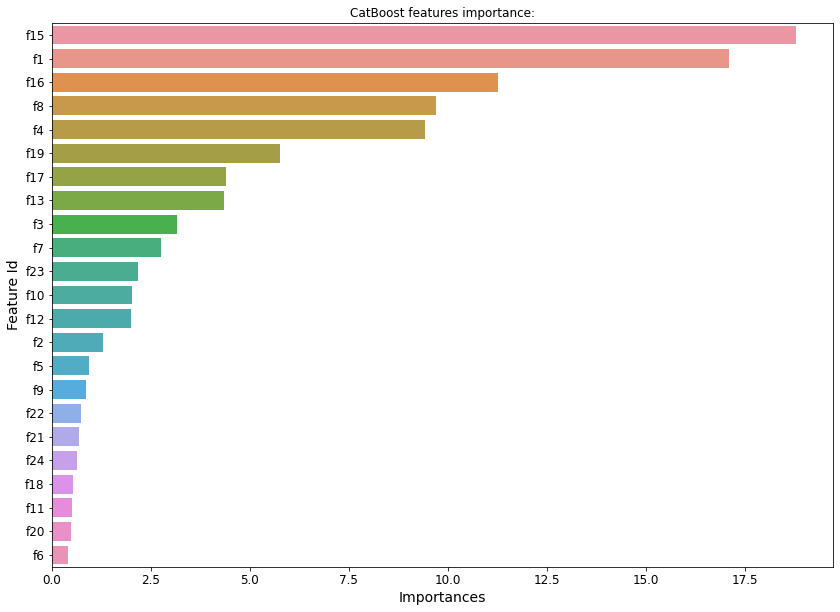

In [82]:

plt.figure(figsize=(14, 10));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');

In [70]:
cbc.save_model('cbc',
           format="cbm")

In [ ]:
## sanity check
from sklearn.metrics import roc_auc_score

valid_test_pool = Pool(data=X_valid,
                  cat_features=cat_features
                 )

preds = cbc.predict_proba(valid_test_pool)
preds_df = pd.DataFrame({'Y':preds[:,1], 'f14_1':X_valid['f14_1'], 'f14_0':X_valid['f14_0']})

preds_df.loc[preds_df.f14_0==1,'Y']=0
preds_df.loc[preds_df.f14_1==1,'Y']=1

roc_auc_score(y_valid, preds_df['Y'])

In [140]:
test_data = Pool(data=test,
                  cat_features=cat_features
                 )

preds = cbc.predict_proba(test_data)
preds_df = pd.DataFrame({'Id': test_ids, 'Y':preds[:,1], 'f14':test['f14']})


preds_df.loc[preds_df.f14==0,'Y']=0
preds_df.loc[preds_df.f14==1,'Y']=1
preds_df.drop('f14', axis=1, inplace=True)

preds_df.to_csv('cbc_submission.csv', index=False)

In [198]:
# !pip install xgboost

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, RobustScaler
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# from sklearn.impute import SimpleImputer

# num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="mean")),
#         ('std_scaler', RobustScaler()),
#     ])

# # ord_pipeline = Pipeline([
# #         ("imputer", SimpleImputer(strategy="most_frequent")),
# #         ("encoder", OrdinalEncoder()),
# #     ])

# cat_pipeline = Pipeline([
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("encoder", OneHotEncoder(handle_unknown='ignore',sparse=False)),
#     ])

# from sklearn.compose import ColumnTransformer
# from sklearn.feature_selection import VarianceThreshold

# full_pipeline = ColumnTransformer([
# #         ("ord", ord_pipeline, ord_attribs),
#         # ("num", num_pipeline, num_attribs),
#         ("cat", cat_pipeline, cat_features),
#     ])


# X_train_xg = full_pipeline.fit_transform(X_train)
# X_valid_xg = full_pipeline.transform(X_valid)

# test_xg = full_pipeline.transform(test)


# # # first tune for max depth and min child weight comb
# # # tune for gamma
# # # Tune subsample and colsample_bytree
# # # Reducing Learning Rate

# import xgboost
# from xgboost import DMatrix
# train_d = DMatrix(X_train_xg, y_train)
# eval_d = DMatrix(X_valid_xg, y_valid)
# params = {'max_depth': 6,  #4 has been best so far #try 6
#           'eta': 0.1, # best was 0.03
#           'objective': 'binary:logistic',
#           'eval_metric': 'auc',
#           'nthread':-1,
#           'tree_method': 'gpu_hist',
#           'min_child_weight':1 , #try 1 and 3
#           'subsample': 0.6,
#           'gamma': 0.05,
#           'colsample_bytree':0.8,
#           'random_seed': 42
#           # 'scale_pos_weight': np.sqrt((len(train) - train.Y.sum())/(train.Y.sum()))
#           }
# gbm = xgboost.train(params, dtrain=train_d, evals=[(eval_d,'eval')], early_stopping_rounds= 200, num_boost_round=4000, verbose_eval=True)

# # test = full_pipeline.transform(test)
# preds_xg = gbm.predict(DMatrix(X_train_xg))
# roc_auc_score(y_train,preds_xg)